In [4]:
from keras.datasets import mnist
data = mnist.load_data()

In [5]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

In [6]:
import numpy as np
outputs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
weights = [np.random.random((28, 28)) for i in outputs]
print(weights[0][0][0])

0.7186228749808578


In [7]:
input_division=500
def predict_one(weight, input):
    output = 0
    for i in range(len(input)):
        for j in range(len(input[i])):
            output += (input[i][j]/input_division) * weight[i][j]
            # print(output, input[i][j]/input_division, weight[i][j])
            
    return output/100

In [8]:
predict_one(weights[0], X_train[0])

0.2635349019599136

In [48]:
from copy import copy, deepcopy
from tqdm import tqdm
training_weights = deepcopy(weights)
alpha = 0.05
for times in tqdm(range(20)):
    for input_count in range(1000):
        for number_i in range(len(outputs)):
            input = X_train[input_count]
            output = y_train[input_count]
            number_weight = training_weights[number_i]
            prediction = predict_one(number_weight, input)
            expected = 1 if output == outputs[number_i] else 0
            error = (expected - prediction)**2
            delta = expected - prediction
            for i in range(len(number_weight)):
                for j in range (len(number_weight[i])):
                    new_weight = delta * (input[i][j]/input_division) * alpha
                    # print(input[i][j]/input_division)
                    # print(number_weight[i][j], new_weight)
                    number_weight[i][j] += new_weight
            # print('error =>', error, 'prediction =>', prediction,'expected =>', expected)
        # print('-'*20)

100%|█████████████████| 20/20 [12:59<00:00, 39.00s/it]


In [49]:
y_train[1]
predict_one(training_weights[1], X_train[1])

0.041451025529533274

In [50]:
def predict_digit(image, weights):
    probabilities = []
    for i in range(10):
        probabilities.append(predict_one(weights[i], image))
    return probabilities.index(max(probabilities))

In [52]:
predict_digit(X_train[1], training_weights)

0

In [55]:
correct = 0
incorrect = 0
for i in tqdm(range(2000)):
    prediction = predict_digit(X_train[i], training_weights)
    if prediction == y_train[i]:
        correct += 1
    else:
        incorrect += 1
print(correct, incorrect)
print('accuracy', 100 * correct/ (correct + incorrect))
#1000 time for 100 data accuracy - 66.75, time - 1h 12 min
#50 time for data accuracy - 66.75, time - 3 min
#10 time for 1000 data accuracy - 81.4, time - 6 min 13 sec
#20 time for 1000 data accuracy - 83.6, time - 12:59

100%|█████████████| 2000/2000 [00:45<00:00, 43.55it/s]

1672 328
accuracy 83.6


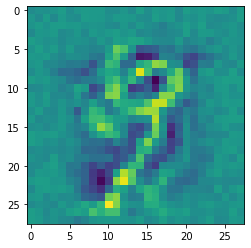

In [23]:
import matplotlib.pyplot as plt
plt.imshow(training_weights[9])

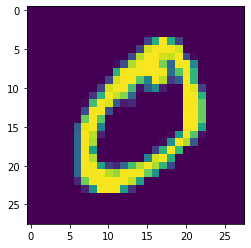

In [293]:
plt.imshow(X_train[1])

In [294]:
!pwd

/Users/tnluser/BYJUS/temp/experiments
